In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
sns.set()
from sklearn import model_selection
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score
import itertools
from scipy.stats import chi2_contingency
from sklearn.metrics import make_scorer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

In [ ]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f')
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()

# **EDA**

In [ ]:
df = pd.read_excel('default of credit card clients.xls')
seed=42

In [ ]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers)

**I will change headers**

In [ ]:
df.isnull().any()

0
ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [ ]:
df.describe(include="all").T

,count,unique,top,freq
0,,,,
ID,30000,30000,30000,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


In [ ]:
for i in df:
  df[i] = df[i].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  float64
 3   EDUCATION                   30000 non-null  float64
 4   MARRIAGE                    30000 non-null  float64
 5   AGE                         30000 non-null  float64
 6   PAY_0                       30000 non-null  float64
 7   PAY_2                       30000 non-null  float64
 8   PAY_3                       30000 non-null  float64
 9   PAY_4                       30000 non-null  float64
 10  PAY_5                       30000 non-null  float64
 11  PAY_6                       30000 non-null  float64
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
categorical_columns = []
numeric_columns = []
 
for i in  df:
  if df[i].nunique() <=11:
    categorical_columns.append(i)
  else:
    numeric_columns.append(i)
       

**Dividing data for visualations and correlations**

In [ ]:
numeric_columns

['ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
seed= 42
train, test = model_selection.train_test_split(df, test_size=0.33, random_state=seed)
y_train = train['default payment next month']
X_train = train.drop(['default payment next month','ID'], axis=1)
y_test = test['default payment next month']
X_test = test.drop(['default payment next month','ID'], axis=1)

**Creating test and train data**

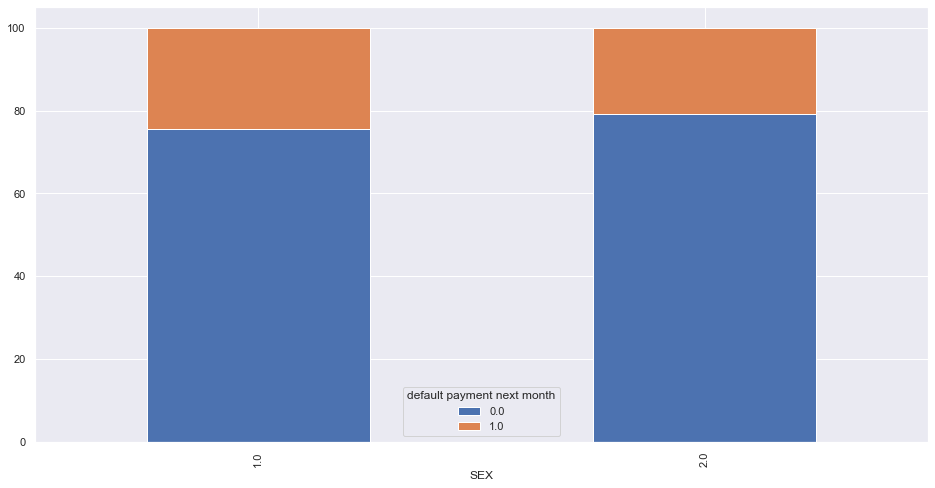

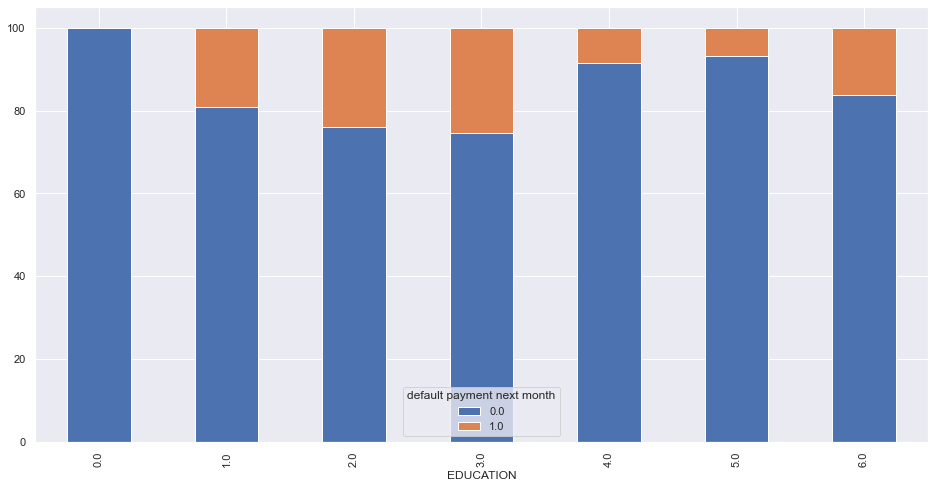

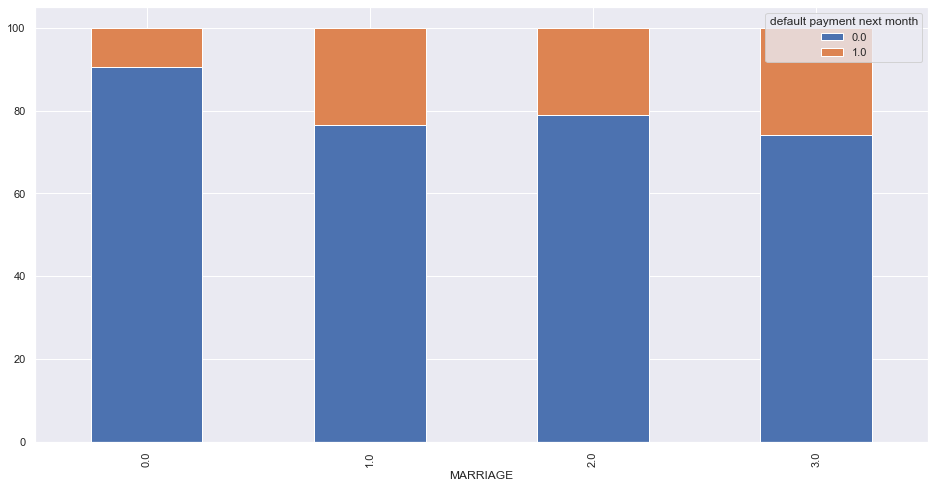

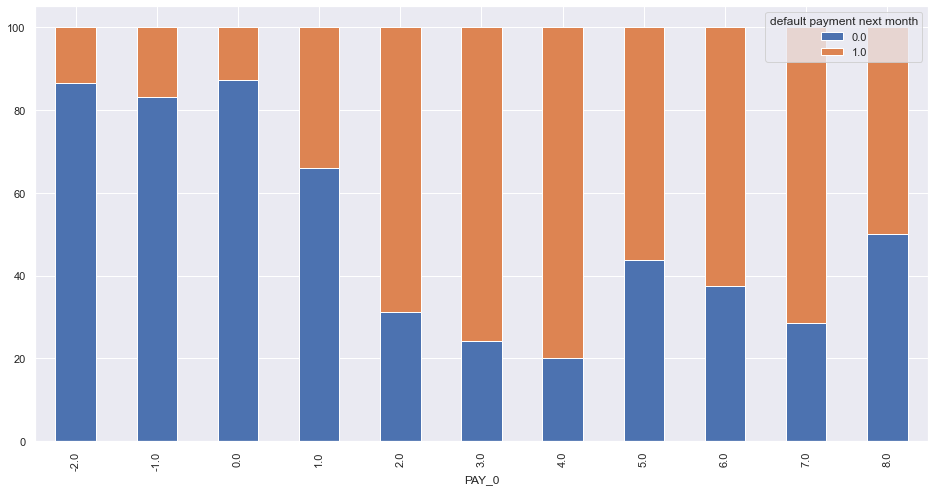

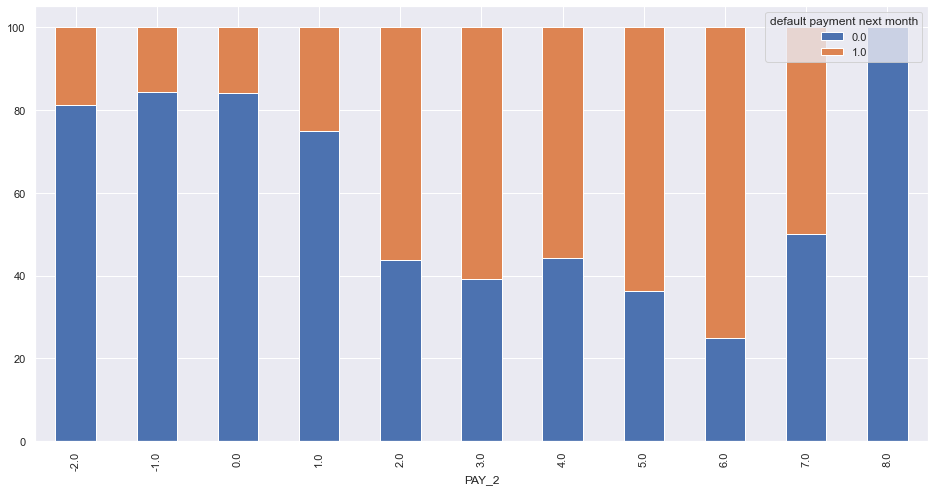

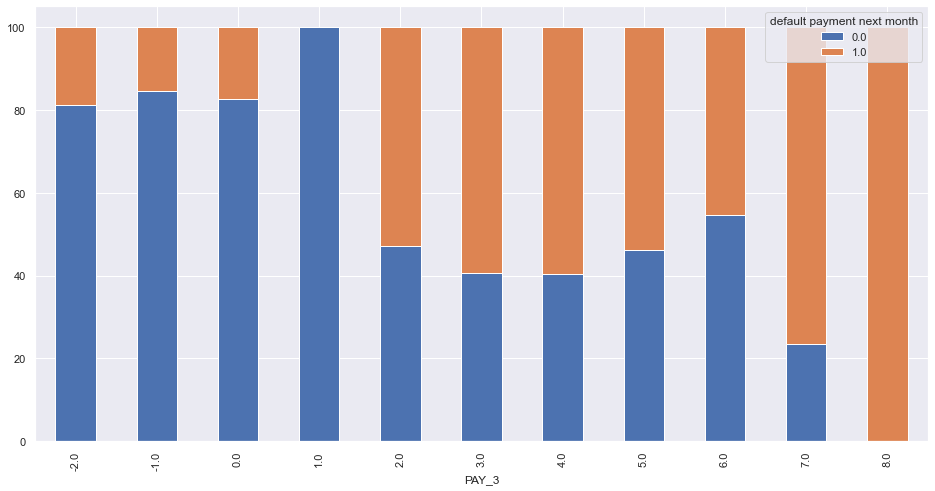

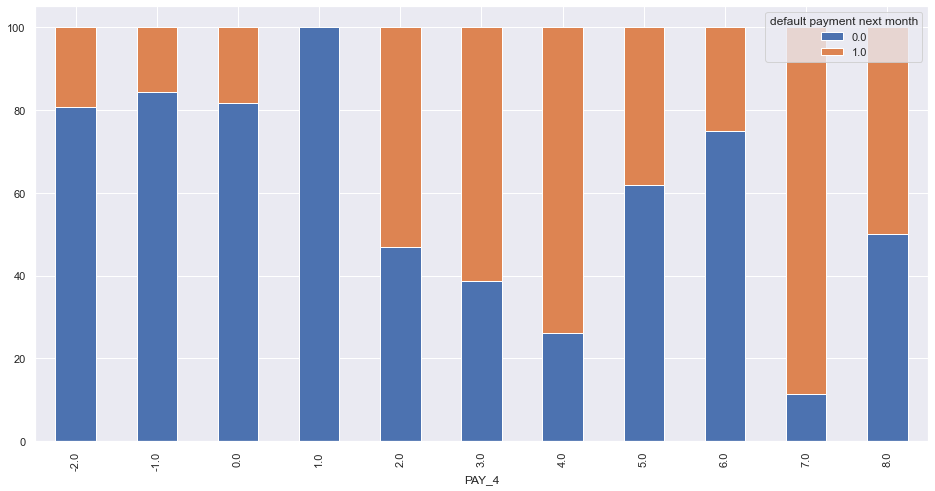

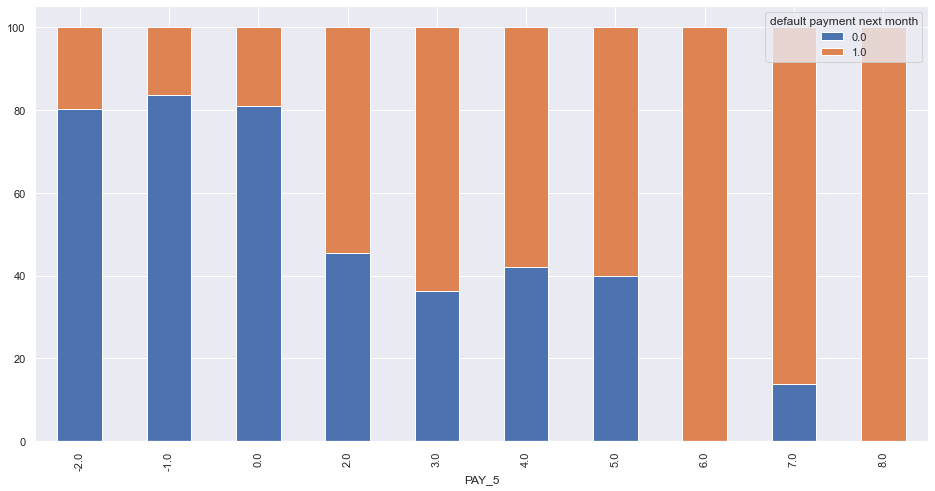

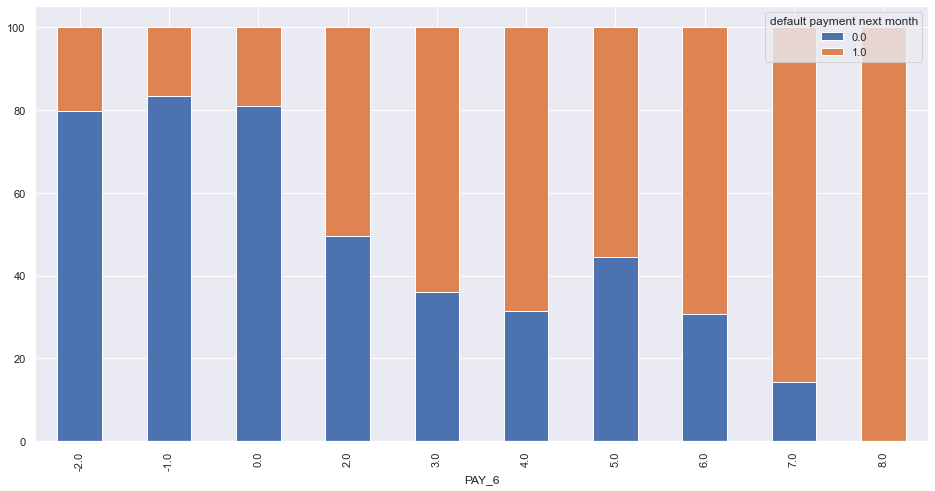

In [ ]:
for i in categorical_columns:
    if i!="default payment next month":
        ((train.groupby([i,"default payment next month"])[i].count() / train.groupby([i,"default payment next month"])["default payment next month"].count().groupby(i).sum()).unstack("default payment next month")*100).plot(kind="bar",stacked=True,figsize=(16,8))

For payment 0,-1,-2 has very low 1 percentage   as expected marriage(o) differ ,sex has a little effect, education 4,5 and 6 have similiar low 1 rates compare to other education levels.(binning categories together seems a possibilty.

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

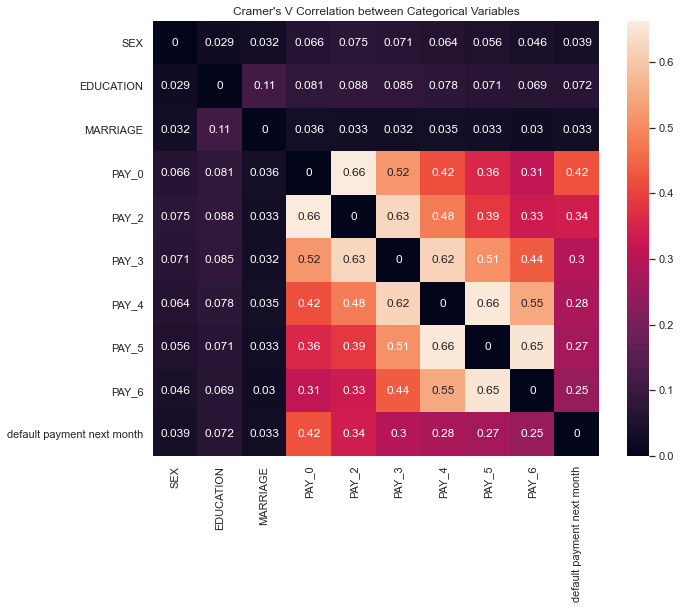

In [ ]:
import itertools
from scipy.stats import chi2_contingency
corrM = np.zeros((len(categorical_columns),len(categorical_columns)))
for col1, col2 in itertools.combinations(categorical_columns, 2):
    idx1, idx2 = df[categorical_columns].columns.get_loc(col1), df[categorical_columns].columns.get_loc(col2)
    corrM[idx1, idx2] = cramers_v(df[categorical_columns][col1], df[categorical_columns][col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=categorical_columns, columns=categorical_columns)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer\'s V Correlation between Categorical Variables");

**We can easily see that following periods have correlation with each other**

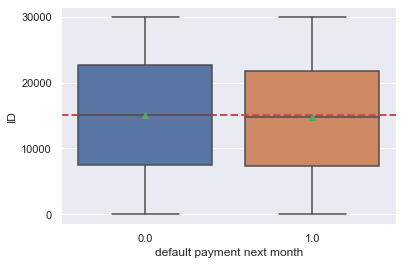

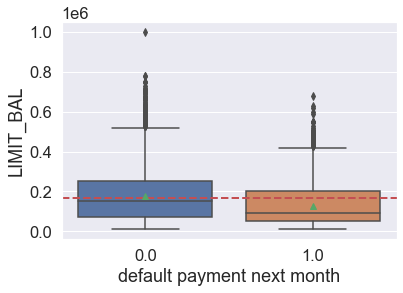

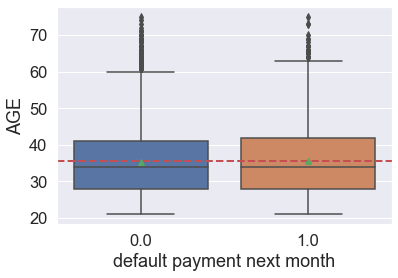

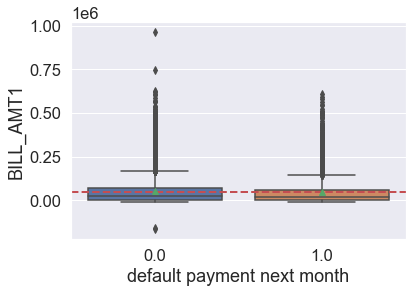

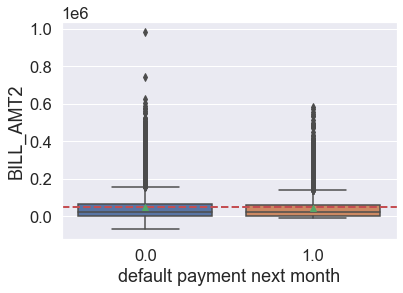

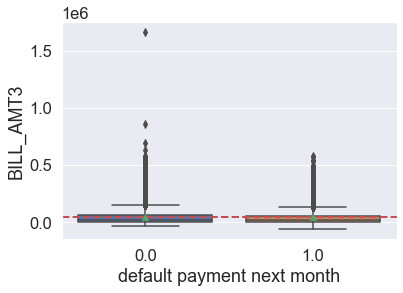

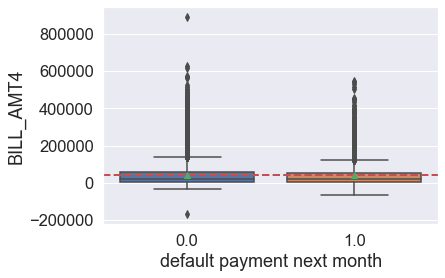

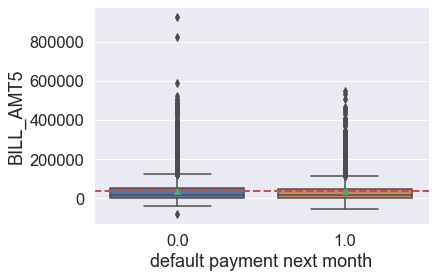

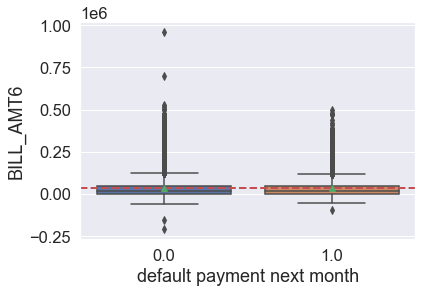

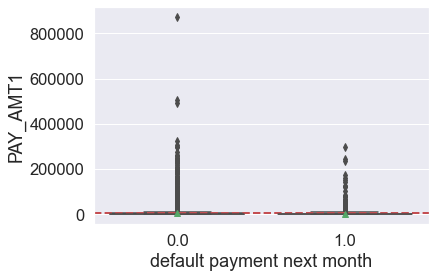

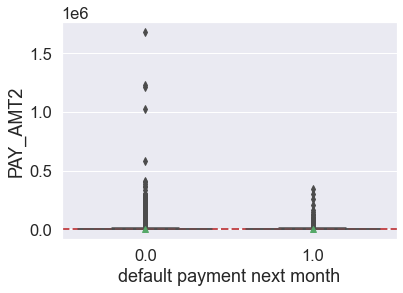

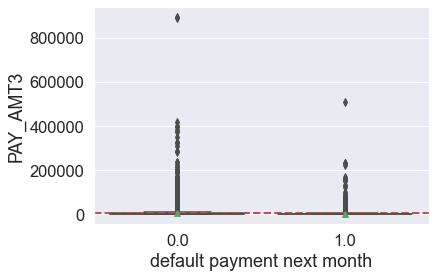

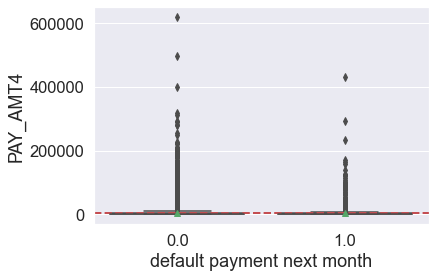

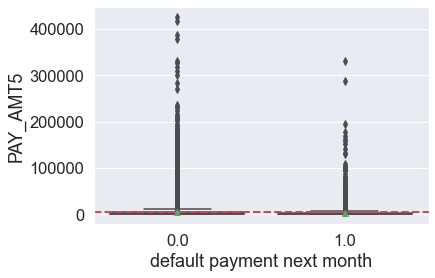

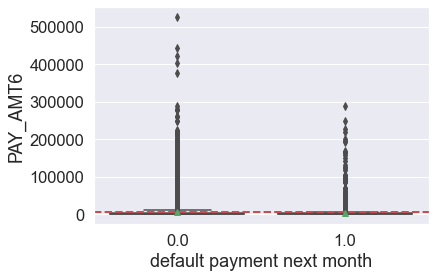

In [ ]:
for i in numeric_columns:
 sns.boxplot(x=train["default payment next month"], y=train[i], showmeans=True)
 plt.axhline(train[i].mean(), color='r', linestyle='dashed', linewidth=2)
 sns.set(font_scale=1.5)
 plt.show()


**PAY AMOUNT SEEMS HIGHER FOR 0**

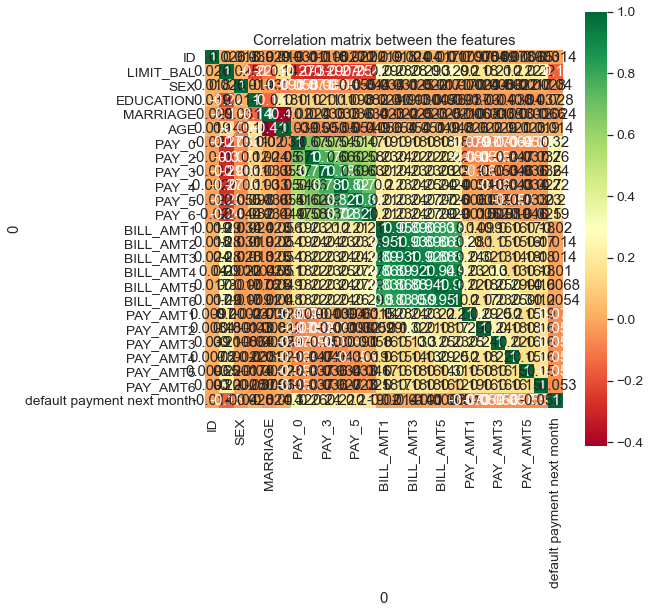

In [ ]:
sns.set(font_scale=1.25)
correlation_matrix = df.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the features')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

**We can also see from here that pay situations and  bill amount have high correlation within their groups(kendi içlerinde kendi periyotlarıyla)**

**MODEL SELECTION**

#LOGISTIC REGRESSION 

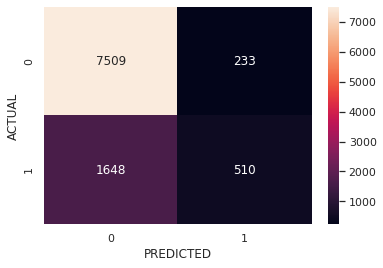


               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      7742
         1.0       0.69      0.24      0.35      2158

    accuracy                           0.81      9900
   macro avg       0.75      0.60      0.62      9900
weighted avg       0.79      0.81      0.77      9900



In [ ]:

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
logr = LogisticRegression(random_state=42)
logr.fit(X_train_scaled, y_train)
y_pred = logr.predict(X_test_scaled)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
pipeline = Pipeline(steps=[("sts",StandardScaler()),
                           ('clf',   LogisticRegression(random_state=seed))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'clf__class_weight': [{0:0.2,1:1}, {0:0.3,1:1}, {0:0.4,1:1}, {0:0.5,1:1}, {0:0.6,1:1}, 'balanced']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'clf__class_weight': [{0:0.2,1:1}, {0:0.3,1:1}, {0:0.4,1:1}, {0:0.5,1:1}, {0:0.6,1:1}, 'balanced']},
         ]


kfold = StratifiedKFold(n_splits = 4, random_state = seed) # train/validation with the same ratio of classes
grid = GridSearchCV(pipeline, param_grid = params, cv = kfold, verbose = 1,scoring=f1_scorer, n_jobs = -1)
grid.fit(X_train, y_train)
print(grid.best_estimator_,'\n')
print('Best parameters  :', grid.best_params_)
print('\nTraining accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', grid.score(X_test, y_test))

Fitting 4 folds for each of 1596 candidates, totalling 6384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 6384 out of 6384 | elapsed: 31.8min finished


Pipeline(memory=None,
         steps=[('sts',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.20000000000000004,
                                    class_weight={0: 0.4, 1: 1}, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False) 

Best parameters  : {'clf__C': 0.20000000000000004, 'clf__class_weight': {0: 0.4, 1: 1}, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

Training accuracy: 0.5138435497521461
Test accuracy    : 0.5034722222222222


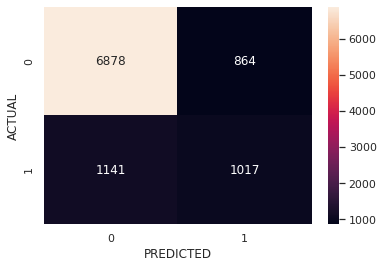


               precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      7742
         1.0       0.54      0.47      0.50      2158

    accuracy                           0.80      9900
   macro avg       0.70      0.68      0.69      9900
weighted avg       0.79      0.80      0.79      9900



In [ ]:

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
logr = LogisticRegression(C=0.3500000000000001,
                                    class_weight={0: 0.4, 1: 1}, penalty='l1',
                                    random_state=42, solver='liblinear')
logr.fit(X_train_scaled, y_train)
y_pred = logr.predict(X_test_scaled)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

lOGISTIC REGRESSION SCORE: 50 

I did try logistic regression with class weights and I got a result of 50 from my grid search

#   RANDOM FOREST

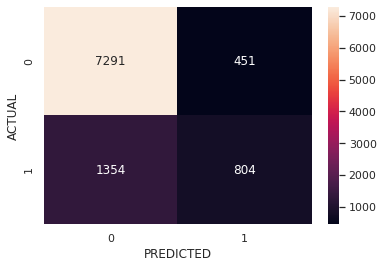


               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7742
         1.0       0.64      0.37      0.47      2158

    accuracy                           0.82      9900
   macro avg       0.74      0.66      0.68      9900
weighted avg       0.80      0.82      0.80      9900



In [ ]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
clf = RandomForestClassifier(random_state=seed)
n_estimators = [20, 50, 100, 150, 200, 400, 600]
cv_scores = [] ; train_scores = [] ; 
print('num-of-trees  CV-mean-score  Train-score')

for i in n_estimators:
    clf.set_params(n_estimators = i)
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring=f1_scorer)
    cv_scores.append(scores.mean())
    clf.fit(X_train, y_train)
    acc = f1_score(y_train, clf.predict(X_train))
    train_scores.append(acc)

    print('%4d          %5.3f          %5.3f' %(i, scores.mean(), acc ))


num-of-trees  CV-mean-score  Train-score
  20          0.461          0.984
  50          0.469          0.998
 100          0.478          0.999
 150          0.479          0.999
 200          0.478          0.999
 400          0.480          0.999
 600          0.480          0.999


ı will use 100 n estimators as results do not get much better after 100

In [ ]:
param_grid = {"criterion"        : ['gini'],
              "min_samples_split": [2,4],
              "max_features"     : [3,5,7,10],
              "max_depth"        : [8, 11, 14],
              "min_samples_leaf" : [1,  3],
              "class_weight"     : [{0:1, 1:w} for w in [1,3,5,8,12]]
              }

kfolds = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, random_state = seed), 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train, y_train) )
print( 'RF Test accuracy     :', grid_search.score(X_test, y_test) ,"\n")

Fitting 4 folds for each of 240 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 45.9min finished


Best parameters       :
 {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2} 

RF Training accuracy : 0.5946004789897671
RF Test accuracy     : 0.5341392433400491 



I got an f1 score of 53 so I will try to narrow my grid search.

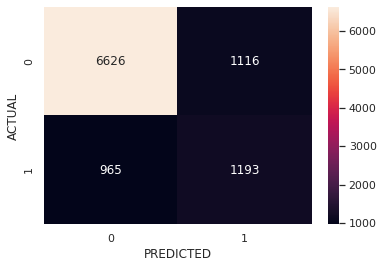


               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      7742
         1.0       0.52      0.55      0.53      2158

    accuracy                           0.79      9900
   macro avg       0.69      0.70      0.70      9900
weighted avg       0.80      0.79      0.79      9900



In [ ]:

RF = RandomForestClassifier(n_estimators=100,class_weight= {0: 1, 1: 3}, criterion='gini', max_depth= 8, max_features= 3, min_samples_leaf= 3, min_samples_split= 2,random_state=42)




RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  8.0min finished


Best parameters       :
 {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 4} 

RF Training accuracy : 0.5698659517426273
RF Test accuracy     : 0.533245556287031 



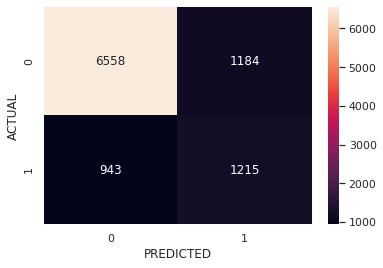


               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      7742
         1.0       0.51      0.56      0.53      2158

    accuracy                           0.79      9900
   macro avg       0.69      0.71      0.70      9900
weighted avg       0.79      0.79      0.79      9900



In [ ]:
param_grid = {"criterion"        : ['gini',"entropy"],
              "min_samples_split": [2,4,6],
              "max_features"     : [2,3,4],
              "max_depth"        : [6,8,10],
              "min_samples_leaf" : [1,3],
              "class_weight"     : [{0:1, 1:w} for w in [3,4]]
              }

kfolds = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator = RandomForestClassifier(n_estimators=50, random_state = seed), 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train, y_train) )
print( 'RF Test accuracy     :', grid_search.score(X_test, y_test) ,"\n")
y_pred = grid_search.predict(X_test)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

Results did not getter but my results are: 

RF:53
LOGISTIC REGRESSION:50

# KNN AND DECISION TREE

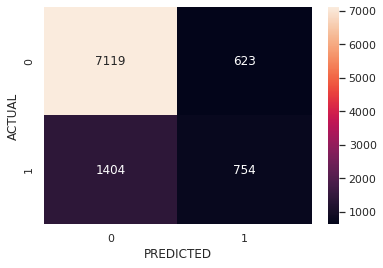


               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      7742
         1.0       0.55      0.35      0.43      2158

    accuracy                           0.80      9900
   macro avg       0.69      0.63      0.65      9900
weighted avg       0.77      0.80      0.78      9900



In [ ]:

KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred = KNN.predict(X_test_scaled)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

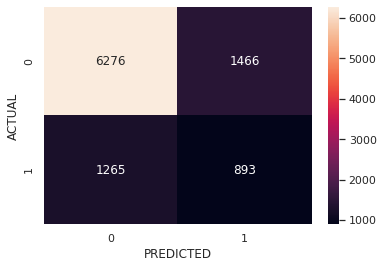


               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      7742
         1.0       0.38      0.41      0.40      2158

    accuracy                           0.72      9900
   macro avg       0.61      0.61      0.61      9900
weighted avg       0.73      0.72      0.73      9900



In [ ]:

dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

# EXTRA TREES

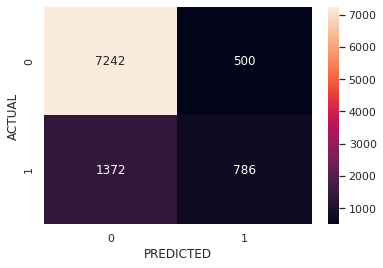


               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7742
         1.0       0.61      0.36      0.46      2158

    accuracy                           0.81      9900
   macro avg       0.73      0.65      0.67      9900
weighted avg       0.79      0.81      0.79      9900



In [ ]:

et =ExtraTreesClassifier( random_state=seed)
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

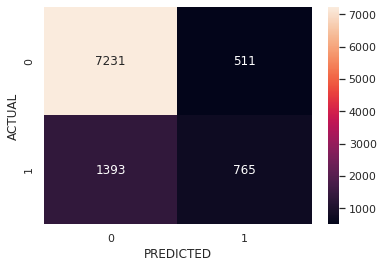


               precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      7742
         1.0       0.60      0.35      0.45      2158

    accuracy                           0.81      9900
   macro avg       0.72      0.64      0.66      9900
weighted avg       0.79      0.81      0.79      9900



In [ ]:
et =ExtraTreesClassifier( random_state=seed,n_estimators=50)
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

I will use 50 estimars although it has a lower base score for save time


In [ ]:
param_grid = {"criterion"        : ['gini'],
              "min_samples_split": [2,4],
              "max_features"     : [3,5,7,12],
              "max_depth"        : [8, 11, 14],
              "min_samples_leaf" : [1,  3],
              "class_weight"     : [{0:1, 1:w} for w in [1,2,2.5,3,5]]
              }

kfolds = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator = ExtraTreesClassifier(n_estimators=50, random_state = seed), 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train, y_train) )
print( 'RF Test accuracy     :', grid_search.score(X_test, y_test) ,"\n")

Fitting 4 folds for each of 240 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  7.1min finished


Best parameters       :
 {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 11, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 2} 

RF Training accuracy : 0.5838440111420613
RF Test accuracy     : 0.5355042966983266 



I got my best result of 54

In [ ]:
param_grid = {"criterion"        : ['gini',"entropy"],
              "min_samples_split": [2,3],
              "max_features"     : [6,7,8],
              "max_depth"        : [10, 11, 12],
              "min_samples_leaf" : [2,3,4],
              "class_weight"     : [{0:1, 1:w} for w in [3,4]]
              }

kfolds = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator = ExtraTreesClassifier(n_estimators=50, random_state = seed), 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train, y_train) )
print( 'RF Test accuracy     :', grid_search.score(X_test, y_test) ,"\n")

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  4.6min finished


Best parameters       :
 {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 2} 

RF Training accuracy : 0.5694013303769402
RF Test accuracy     : 0.5361894024802706 



Score got little bit better bu still 54

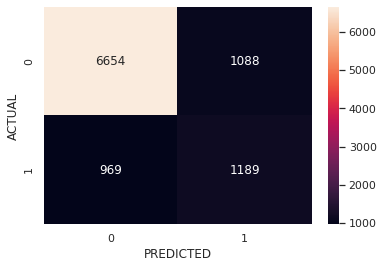


               precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      7742
         1.0       0.52      0.55      0.54      2158

    accuracy                           0.79      9900
   macro avg       0.70      0.71      0.70      9900
weighted avg       0.80      0.79      0.79      9900



In [ ]:

et =ExtraTreesClassifier(n_estimators=50,class_weight= {0: 1, 1: 3}, criterion='entropy', max_depth= 10, max_features= 6, min_samples_leaf= 4, min_samples_split= 2,random_state=42)




et.fit(X_train, y_train)
y_pred = et.predict(X_test)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))



RF:53
LOGISTIC REGRESSION:50

EXTRA TREES: 54

# ADABOOST AND SVC

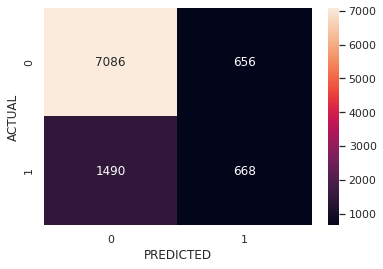


               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      7742
         1.0       0.50      0.31      0.38      2158

    accuracy                           0.78      9900
   macro avg       0.67      0.61      0.63      9900
weighted avg       0.76      0.78      0.76      9900



In [ ]:
dt = DecisionTreeClassifier(random_state=42)
adab = AdaBoostClassifier(base_estimator = dt)
adab.fit(X_train, y_train)
y_pred = adab.predict(X_test)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

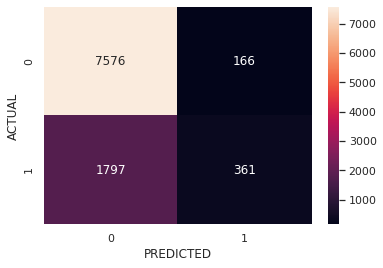


               precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      7742
         1.0       0.69      0.17      0.27      2158

    accuracy                           0.80      9900
   macro avg       0.75      0.57      0.58      9900
weighted avg       0.78      0.80      0.75      9900



In [ ]:

svcl = LinearSVC(random_state=seed,)
svcl.fit(X_train_scaled, y_train)
y_pred = svcl.predict(X_test_scaled)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

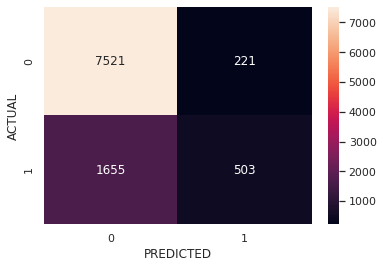


               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      7742
         1.0       0.69      0.23      0.35      2158

    accuracy                           0.81      9900
   macro avg       0.76      0.60      0.62      9900
weighted avg       0.79      0.81      0.77      9900



In [ ]:

svcl = SVC(kernel='linear', random_state=seed)
svcl.fit(X_train_scaled, y_train)
y_pred = svcl.predict(X_test_scaled)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

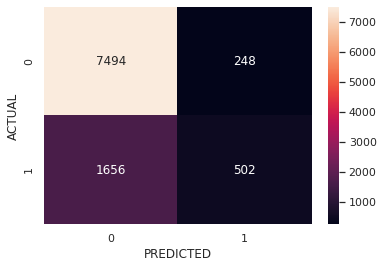


               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      7742
         1.0       0.67      0.23      0.35      2158

    accuracy                           0.81      9900
   macro avg       0.74      0.60      0.62      9900
weighted avg       0.79      0.81      0.77      9900



In [ ]:

svcl = SVC(kernel="poly",random_state=seed)
svcl.fit(X_train_scaled, y_train)
y_pred = svcl.predict(X_test_scaled)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

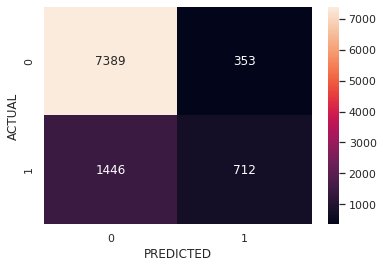


               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      7742
         1.0       0.67      0.33      0.44      2158

    accuracy                           0.82      9900
   macro avg       0.75      0.64      0.67      9900
weighted avg       0.80      0.82      0.79      9900



In [ ]:

svcl = SVC(kernel='rbf',random_state=seed)
svcl.fit(X_train_scaled, y_train)
y_pred = svcl.predict(X_test_scaled)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

**FROM ALL THE RESULTS ABOVE KERNEL GİVE ME THE BEST RESULTS SO I will tune it with grid search**

In [ ]:
svcl.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)>

In [ ]:
pipeline = Pipeline(steps=[("sts",StandardScaler()),
                           ('classifier',   SVC(random_state=seed))])

params = [ {'classifier__kernel': ['rbf'],
            'classifier__gamma' : ['scale',"auto"],
            'classifier__C'     : [0.5,1, 2],
            'classifier__class_weight': [{0:0.2,1:1}, {0:0.3,1:1}, {0:0.4,1:1}, {0:0.5,1:1}, {0:0.6,1:1}, 'balanced']}
             ]

kfold = StratifiedKFold(n_splits = 4, random_state = seed)
SVC_rbf = model_selection.GridSearchCV(estimator=pipeline,
                                       param_grid=params, 
                                       cv=kfold,
                                       verbose=1,
                                       n_jobs=-1)

SVC_rbf.fit(X_train, y_train)
print('Best parameters    :', SVC_rbf.best_params_, '\n')
print('Classifier used    :', SVC_rbf.best_estimator_,'\n')
print('Average CV accuracy:', np.mean(SVC_rbf.cv_results_['mean_test_score']))

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 30.2min finished


Best parameters    : {'classifier__C': 1, 'classifier__class_weight': {0: 0.6, 1: 1}, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'} 

Classifier used    : Pipeline(memory=None,
         steps=[('sts',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1, break_ties=False, cache_size=200,
                     class_weight={0: 0.6, 1: 1}, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=42, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False) 

Average CV accuracy: 0.7766777224986181


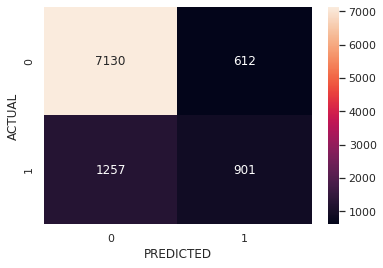


               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      7742
         1.0       0.60      0.42      0.49      2158

    accuracy                           0.81      9900
   macro avg       0.72      0.67      0.69      9900
weighted avg       0.79      0.81      0.80      9900



In [ ]:

svcl = SVC(C=1, break_ties=False, cache_size=200,
                     class_weight={0: 0.6, 1: 1}, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=42, shrinking=True, tol=0.001,
                     verbose=False)
svcl.fit(X_train_scaled, y_train)
y_pred = svcl.predict(X_test_scaled)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))



RF:53 
LOGISTIC REGRESSION:50

EXTRA TREES: 54

SVM : 49 

Extra trees still has the best result.

# GRADIENT BOOSTING WITH UNDERSAMPLING

In [ ]:

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe_imb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb

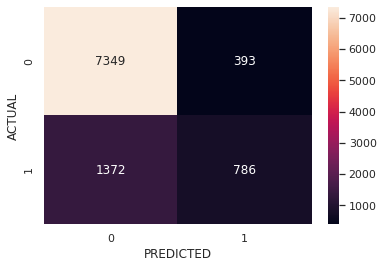


               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      7742
         1.0       0.67      0.36      0.47      2158

    accuracy                           0.82      9900
   macro avg       0.75      0.66      0.68      9900
weighted avg       0.80      0.82      0.80      9900



In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)

gbm = GradientBoostingClassifier(random_state=seed)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
draw_cm( y_test, y_pred )
print('\n',classification_report(y_test, y_pred))

In [ ]:
unsmp_pipe = pipe_imb([
                       ('sampler', RandomUnderSampler(random_state=seed)),
                       ('clf'    , GradientBoostingClassifier(random_state=seed))])

param_grid = {
    'sampler__sampling_strategy': [0.2,0.4,0.6, 0.8, 1.0],
    'clf__n_estimators'     : [50, 60, 70,80],
    'clf__learning_rate'    : [0.15, 0.20, 0.25, 0.30]
    }

kfold = StratifiedKFold(n_splits = 4, random_state = seed)    
grid_gbm = GridSearchCV(estimator=unsmp_pipe,scoring=f1_scorer,
                              param_grid = param_grid, cv = kfold, n_jobs = -1)

grid_gbm.fit(X_train, y_train)

print(grid_gbm.best_params_)
print( 'RF Training accuracy :', grid_gbm.score(X_train.values, y_train.values) )
print( 'RF Test accuracy     :', grid_gbm.score(X_test.values, y_test.values) ,"\n") 



{'clf__learning_rate': 0.15, 'clf__n_estimators': 80, 'sampler__sampling_strategy': 0.8}
RF Training accuracy : 0.5710359408033826
RF Test accuracy     : 0.5368782161234992 



**It is my best result for all models it is a little bit better than extra trees.**

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
unsmp_pipe = pipe_imb([
                       ('sampler', RandomUnderSampler(random_state=seed,sampling_strategy=0.8)),
                       ('clf'    , GradientBoostingClassifier(random_state=seed,learning_rate=0.15,n_estimators=80))])

param_grid = {
    'clf__min_samples_split': [2, 3, 5,10],
    'clf__min_samples_leaf' : [5, 10, 15, 20],
    'clf__max_depth'        : [2, 3, 5]}

kfold = StratifiedKFold(n_splits = 4, random_state = seed)    
grid_gbm = GridSearchCV(estimator=unsmp_pipe,scoring=f1_scorer,
                              param_grid = param_grid, cv = kfold, n_jobs = -1)




grid_gbm.fit(X_train, y_train)

print(grid_gbm.best_params_)
print( 'RF Training accuracy :', grid_gbm.score(X_train.values, y_train.values) )
print( 'RF Test accuracy     :', grid_gbm.score(X_test.values, y_test.values) ,"\n") 


{'clf__max_depth': 3, 'clf__min_samples_leaf': 15, 'clf__min_samples_split': 2}
RF Training accuracy : 0.5675356721381827
RF Test accuracy     : 0.539232781168265 



Result got little bit better i will try learing rate and n estimators for this model


In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
unsmp_pipe = pipe_imb([
                       ('sampler', RandomUnderSampler(random_state=seed,sampling_strategy=0.8)),
                       ('clf'    , GradientBoostingClassifier(random_state=seed,learning_rate=0.15,n_estimators=80,max_depth=3,min_samples_leaf=15,min_samples_split= 2))])

param_grid = {
    'clf__n_estimators'     : [70,80,100,120],
    'clf__learning_rate'    : [0.05,0.10,0.15]
    }

kfold = StratifiedKFold(n_splits = 4, random_state = seed)    
grid_gbm = GridSearchCV(estimator=unsmp_pipe,scoring=f1_scorer,
                              param_grid = param_grid, cv = kfold, n_jobs = -1)




grid_gbm.fit(X_train, y_train)

print(grid_gbm.best_params_)
print( 'RF Training accuracy :', grid_gbm.score(X_train.values, y_train.values) )
print( 'RF Test accuracy     :', grid_gbm.score(X_test.values, y_test.values) ,"\n") 

{'clf__learning_rate': 0.1, 'clf__n_estimators': 120}
RF Training accuracy : 0.567392458842273
RF Test accuracy     : 0.5359618717504332 



It is not better so previous model is my best model with 53.9



RF:53 

LOGISTIC REGRESSION:50

EXTRA TREES: 54

**GRADIENT BOOSTING:54**

SVM : 49 



Gradient boosting has the best result.

# XGB WITH SMOTEENN

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
SMOTEENN_pipe = pipe_imb([
                          ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                          ('clf'    , XGBClassifier(seed=seed,objective='binary:logistic'))])

param_grid = {'sampler__sampling_strategy': [0.2,0.4, 0.6, 0.8, 1.0],
              'clf__learning_rate': [0.03, 0.05, 0.07,0.1,0.2],
              'clf__n_estimators' : [60,80, 100, 125, 150]}
kfolds = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=seed )
grid_search = GridSearchCV(estimator = SMOTEENN_pipe, 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train.values, y_train.values)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train.values, y_train.values) )
print( 'RF Test accuracy     :', grid_search.score(X_test.values, y_test.values) ,"\n") 

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 11.1min finished


Best parameters       :
 {'clf__learning_rate': 0.1, 'clf__n_estimators': 80, 'sampler__sampling_strategy': 0.4} 

RF Training accuracy : 0.5572653103377052
RF Test accuracy     : 0.5289047719150726 



My result is 53 I will continue to tune

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
SMOTEENN_pipe = pipe_imb([
                          ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                          ('clf'    , XGBClassifier(seed=seed,objective='binary:logistic'))])

param_grid = {'sampler__sampling_strategy': [0.3,0.4, 0.5,],
              'clf__learning_rate': [ 0.1],
              'clf__n_estimators' : [ 80]}
kfolds = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=seed )
grid_search = GridSearchCV(estimator = SMOTEENN_pipe, 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train.values, y_train.values)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train.values, y_train.values) )
print( 'RF Test accuracy     :', grid_search.score(X_test.values, y_test.values) ,"\n") 

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   21.4s finished


Best parameters       :
 {'clf__learning_rate': 0.1, 'clf__n_estimators': 80, 'sampler__sampling_strategy': 0.4} 

RF Training accuracy : 0.5572653103377052
RF Test accuracy     : 0.5289047719150726 



Not better

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
SMOTEENN_pipe = pipe_imb([
                          ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                          ('clf'    , XGBClassifier(seed=seed,objective='binary:logistic'))])

param_grid = {'sampler__sampling_strategy': [0.4],
              'clf__learning_rate': [0.1],
              'clf__n_estimators' : [ 80],
              'clf__min_child_weight' : [0.5, 1, 2, 3, 4, 5],
              "clf__max_depth" : [4, 5, 6, 7, 8]
              }
kfolds = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=seed )
grid_search = GridSearchCV(estimator = SMOTEENN_pipe, 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train.values, y_train.values)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train.values, y_train.values) )
print( 'RF Test accuracy     :', grid_search.score(X_test.values, y_test.values) ,"\n") 

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.4min finished


Best parameters       :
 {'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__min_child_weight': 2, 'clf__n_estimators': 80, 'sampler__sampling_strategy': 0.4} 

RF Training accuracy : 0.5667818662329742
RF Test accuracy     : 0.5292536696299359 



I will ad two new parameters but result didd not get better

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
SMOTEENN_pipe = pipe_imb([
                          ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                          ('clf'    , XGBClassifier(seed=seed,objective='binary:logistic'))])

param_grid = {'sampler__sampling_strategy': [0.4],
              'clf__learning_rate': [0.1],
              'clf__gamma': [i/10.0 for i in range(0,10)],
              'clf__n_estimators' : [ 80],
              'clf__min_child_weight' : [ 2,],
              "clf__max_depth" : [1,2,3,4]
              }
kfolds = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=seed )
grid_search = GridSearchCV(estimator = SMOTEENN_pipe, 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train.values, y_train.values)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train.values, y_train.values) )
print( 'RF Test accuracy     :', grid_search.score(X_test.values, y_test.values) ,"\n") 

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.8min finished


Best parameters       :
 {'clf__gamma': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__min_child_weight': 2, 'clf__n_estimators': 80, 'sampler__sampling_strategy': 0.4} 

RF Training accuracy : 0.5562300648214837
RF Test accuracy     : 0.5280804694048616 



In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
SMOTEENN_pipe = pipe_imb([
                          ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                          ('clf'    , XGBClassifier(seed=seed,objective='binary:logistic'))])

param_grid = {'sampler__sampling_strategy': [0.4],
              'clf__learning_rate': [0.1],
              'clf__subsample':[0.5, 0.75, 1.0],
              'clf__colsample_bytree':[0.5, 0.75, 1.0],
              'clf__n_estimators' : [ 80],
              'clf__min_child_weight' : [ 2,],
              "clf__max_depth" : [4]
              }
kfolds = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=seed )
grid_search = GridSearchCV(estimator = SMOTEENN_pipe, 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train.values, y_train.values)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train.values, y_train.values) )
print( 'RF Test accuracy     :', grid_search.score(X_test.values, y_test.values) ,"\n") 

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.1min finished


Best parameters       :
 {'clf__colsample_bytree': 0.75, 'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__min_child_weight': 2, 'clf__n_estimators': 80, 'clf__subsample': 0.75, 'sampler__sampling_strategy': 0.4} 

RF Training accuracy : 0.5664129883307967
RF Test accuracy     : 0.5313210667769278 



 This parameters give me the best result for xgboost but not much better 

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
SMOTEENN_pipe = pipe_imb([
                          ('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=seed)),
                          ('clf'    , XGBClassifier(seed=seed,objective='binary:logistic'))])

param_grid = {'sampler__sampling_strategy': [0.4],
              'clf__learning_rate': [0.1],
              'clf__subsample':[ 0.75],
              'clf__colsample_bytree':[ 0.75],
              'clf__reg_alpha':[0, 0.1, 0.2, 0.3, 0.5, 1, 5],
             'clf__reg_lambda':[0, 0.1, 0.2, 0.3, 0.5, 1, 5],
              'clf__n_estimators' : [ 80],
              'clf__min_child_weight' : [ 2,],
              "clf__max_depth" : [4]
              }
kfolds = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=seed )
grid_search = GridSearchCV(estimator = SMOTEENN_pipe, 
                           param_grid = param_grid,
                           scoring=f1_scorer,
                           cv = kfolds,
                           verbose = 1,
                           n_jobs = -1)
grid_search.fit(X_train.values, y_train.values)
print('Best parameters       :\n', grid_search.best_params_,'\n')
print( 'RF Training accuracy :', grid_search.score(X_train.values, y_train.values) )
print( 'RF Test accuracy     :', grid_search.score(X_test.values, y_test.values) ,"\n") 

Fitting 4 folds for each of 49 candidates, totalling 196 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:  5.8min finished


Best parameters       :
 {'clf__colsample_bytree': 0.75, 'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__min_child_weight': 2, 'clf__n_estimators': 80, 'clf__reg_alpha': 0.2, 'clf__reg_lambda': 0.2, 'clf__subsample': 0.75, 'sampler__sampling_strategy': 0.4} 

RF Training accuracy : 0.5649786455155582
RF Test accuracy     : 0.5294969985510245 



It did not improve



RF:53 

LOGISTIC REGRESSION:50

EXTRA TREES: 54

**GRADIENT BOOSTING:54**

SVM : 49 

XGB=53

Gradient boosting still has the best result.

# VOTING CLASSIFIER

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import cluster as clu
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import datasets as dat
from sklearn import ensemble as ens
from sklearn import decomposition as dec
from sklearn import manifold as man
from sklearn import model_selection as mod
from sklearn import svm
from sklearn import metrics as met

In [ ]:
unsmp_pipe = pipe_imb([
                       ('sampler', RandomUnderSampler(random_state=seed,sampling_strategy=0.8)),
                       ('clf'    , GradientBoostingClassifier(random_state=seed,learning_rate=0.15,n_estimators=80,max_depth=3,min_samples_leaf=15,min_samples_split= 2))])
rnd_clf =RandomForestClassifier(n_estimators=100,class_weight= {0: 1, 1: 3}, criterion='gini', max_depth= 8, max_features= 3, min_samples_leaf= 3, min_samples_split= 2,random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=50,class_weight= {0: 1, 1: 3}, criterion='entropy', max_depth= 10, max_features= 6, min_samples_leaf= 4, min_samples_split= 2,random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', unsmp_pipe), ('rf', rnd_clf), ('et', et_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)
for clf in (unsmp_pipe, rnd_clf, et_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      7742
         1.0       0.51      0.57      0.54      2158

    accuracy                           0.79      9900
   macro avg       0.69      0.71      0.70      9900
weighted avg       0.80      0.79      0.79      9900

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      7742
         1.0       0.52      0.55      0.53      2158

    accuracy                           0.79      9900
   macro avg       0.69      0.70      0.70      9900
weighted avg       0.80      0.79      0.79      9900

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      7742
         1.0       0.52      0.55      0.54      2158

    accuracy                           0.79      9900
   macro avg       0.70      0.71      0.70      9900
weighted avg       0.80      0.79      0.79      9900

              preci

It did not improve still 0.54.



In [ ]:


voting_clf = VotingClassifier(
    estimators=[('lr', unsmp_pipe), ('rf', rnd_clf), ('et', et_clf)],
    weights=[1, 1, 1],
    voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      7742
         1.0       0.53      0.55      0.54      2158

    accuracy                           0.79      9900
   macro avg       0.70      0.71      0.70      9900
weighted avg       0.80      0.79      0.80      9900




**CONCLUSION**

RF:53 

VOTING CLASSIFIER:54
LOGISTIC REGRESSION:50

EXTRA TREES: 54

**GRADIENT BOOSTING:54**

SVM : 49 

XGB=53

Gradient boosting  has the best result. My results with different sampling methods are pretty simillar in all esemble models but gradient boosting has the best result with 53.92 .Voting classifier also give me the same result as esemble models.